Lista 0
Exercicio 9

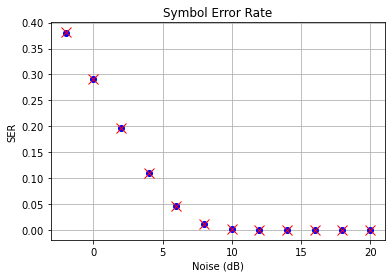

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import math

def modulator(bits):
    if bits & 1:
        real = -np.sqrt(0.5)
    else:
        real = np.sqrt(0.5)
    if bits & 2:
        imag = -np.sqrt(0.5)
    else:
        imag = np.sqrt(0.5)
    return (real + 1.0j*imag)

def demodulator(symbol):
    if symbol.real > 0:
        bits = 0
    else:
        bits = 1
    if symbol.imag <= 0:
        bits = bits | 2
    return (bits)

n = 100000
gaindb = np.arange(-2, 22, 2)
gain = np.sqrt(0.5)*np.power(10, -gaindb/20.0)
gain_pot = np.sqrt(0.5)*np.power(10, -gaindb/10.0)
bitrx = np.zeros(n, dtype=int)
ser_calc = np.zeros(len(gain))
ser_simul = np.zeros(len(gain))

for i in range(len(gain)):
    factor = np.sqrt(np.sqrt(0.5)/(2*gain_pot[i]))
    ser_calc[i] = math.erfc(factor) - 0.25*(math.erfc(factor))**2

    bittx = np.random.randint(4,size=n)
    symbols = np.zeros(n, dtype=complex)

    for j in range(n):
        symbols[j] = modulator(bittx[j])

    noise_real = gain[i] * np.random.normal(0,1,n)
    noise_imag = gain[i] * np.random.normal(0,1,n)
    noise = noise_real + 1.0j*noise_imag
    symbol_plus_noise = symbols + noise
    error_counter = 0
    for j in range(n):
        bitrx[j] = demodulator(symbols[j]+noise[j])
        if bitrx[j] != bittx[j]:
            error_counter = error_counter + 1
    ser_simul[i] = error_counter/n

fig, ax = plt.subplots()
ax.plot(gaindb, ser_simul, 'o', color='blue', markersize=6)
ax.plot(gaindb, ser_calc, 'x', color='red', markersize=10)
ax.set(xlabel='Noise (dB)', ylabel='SER', title='Symbol Error Rate')
ax.grid(True)
plt.show()

